In [2]:
#importing all important libraries

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess

from pandas import Series, DataFrame
from patsy import dmatrices

from sklearn import datasets, svm

In [6]:
data_file = pd.read_csv("train.csv")
#data_file

In [7]:
#cleaning the data set, most of the entries in ticket and cabin has NaN
data_file = data_file.drop(['Ticket','Cabin'], axis=1)
#Removing entries which have atleast on NaN in one of the feature
data_file = data_file.dropna()
data_file[0:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


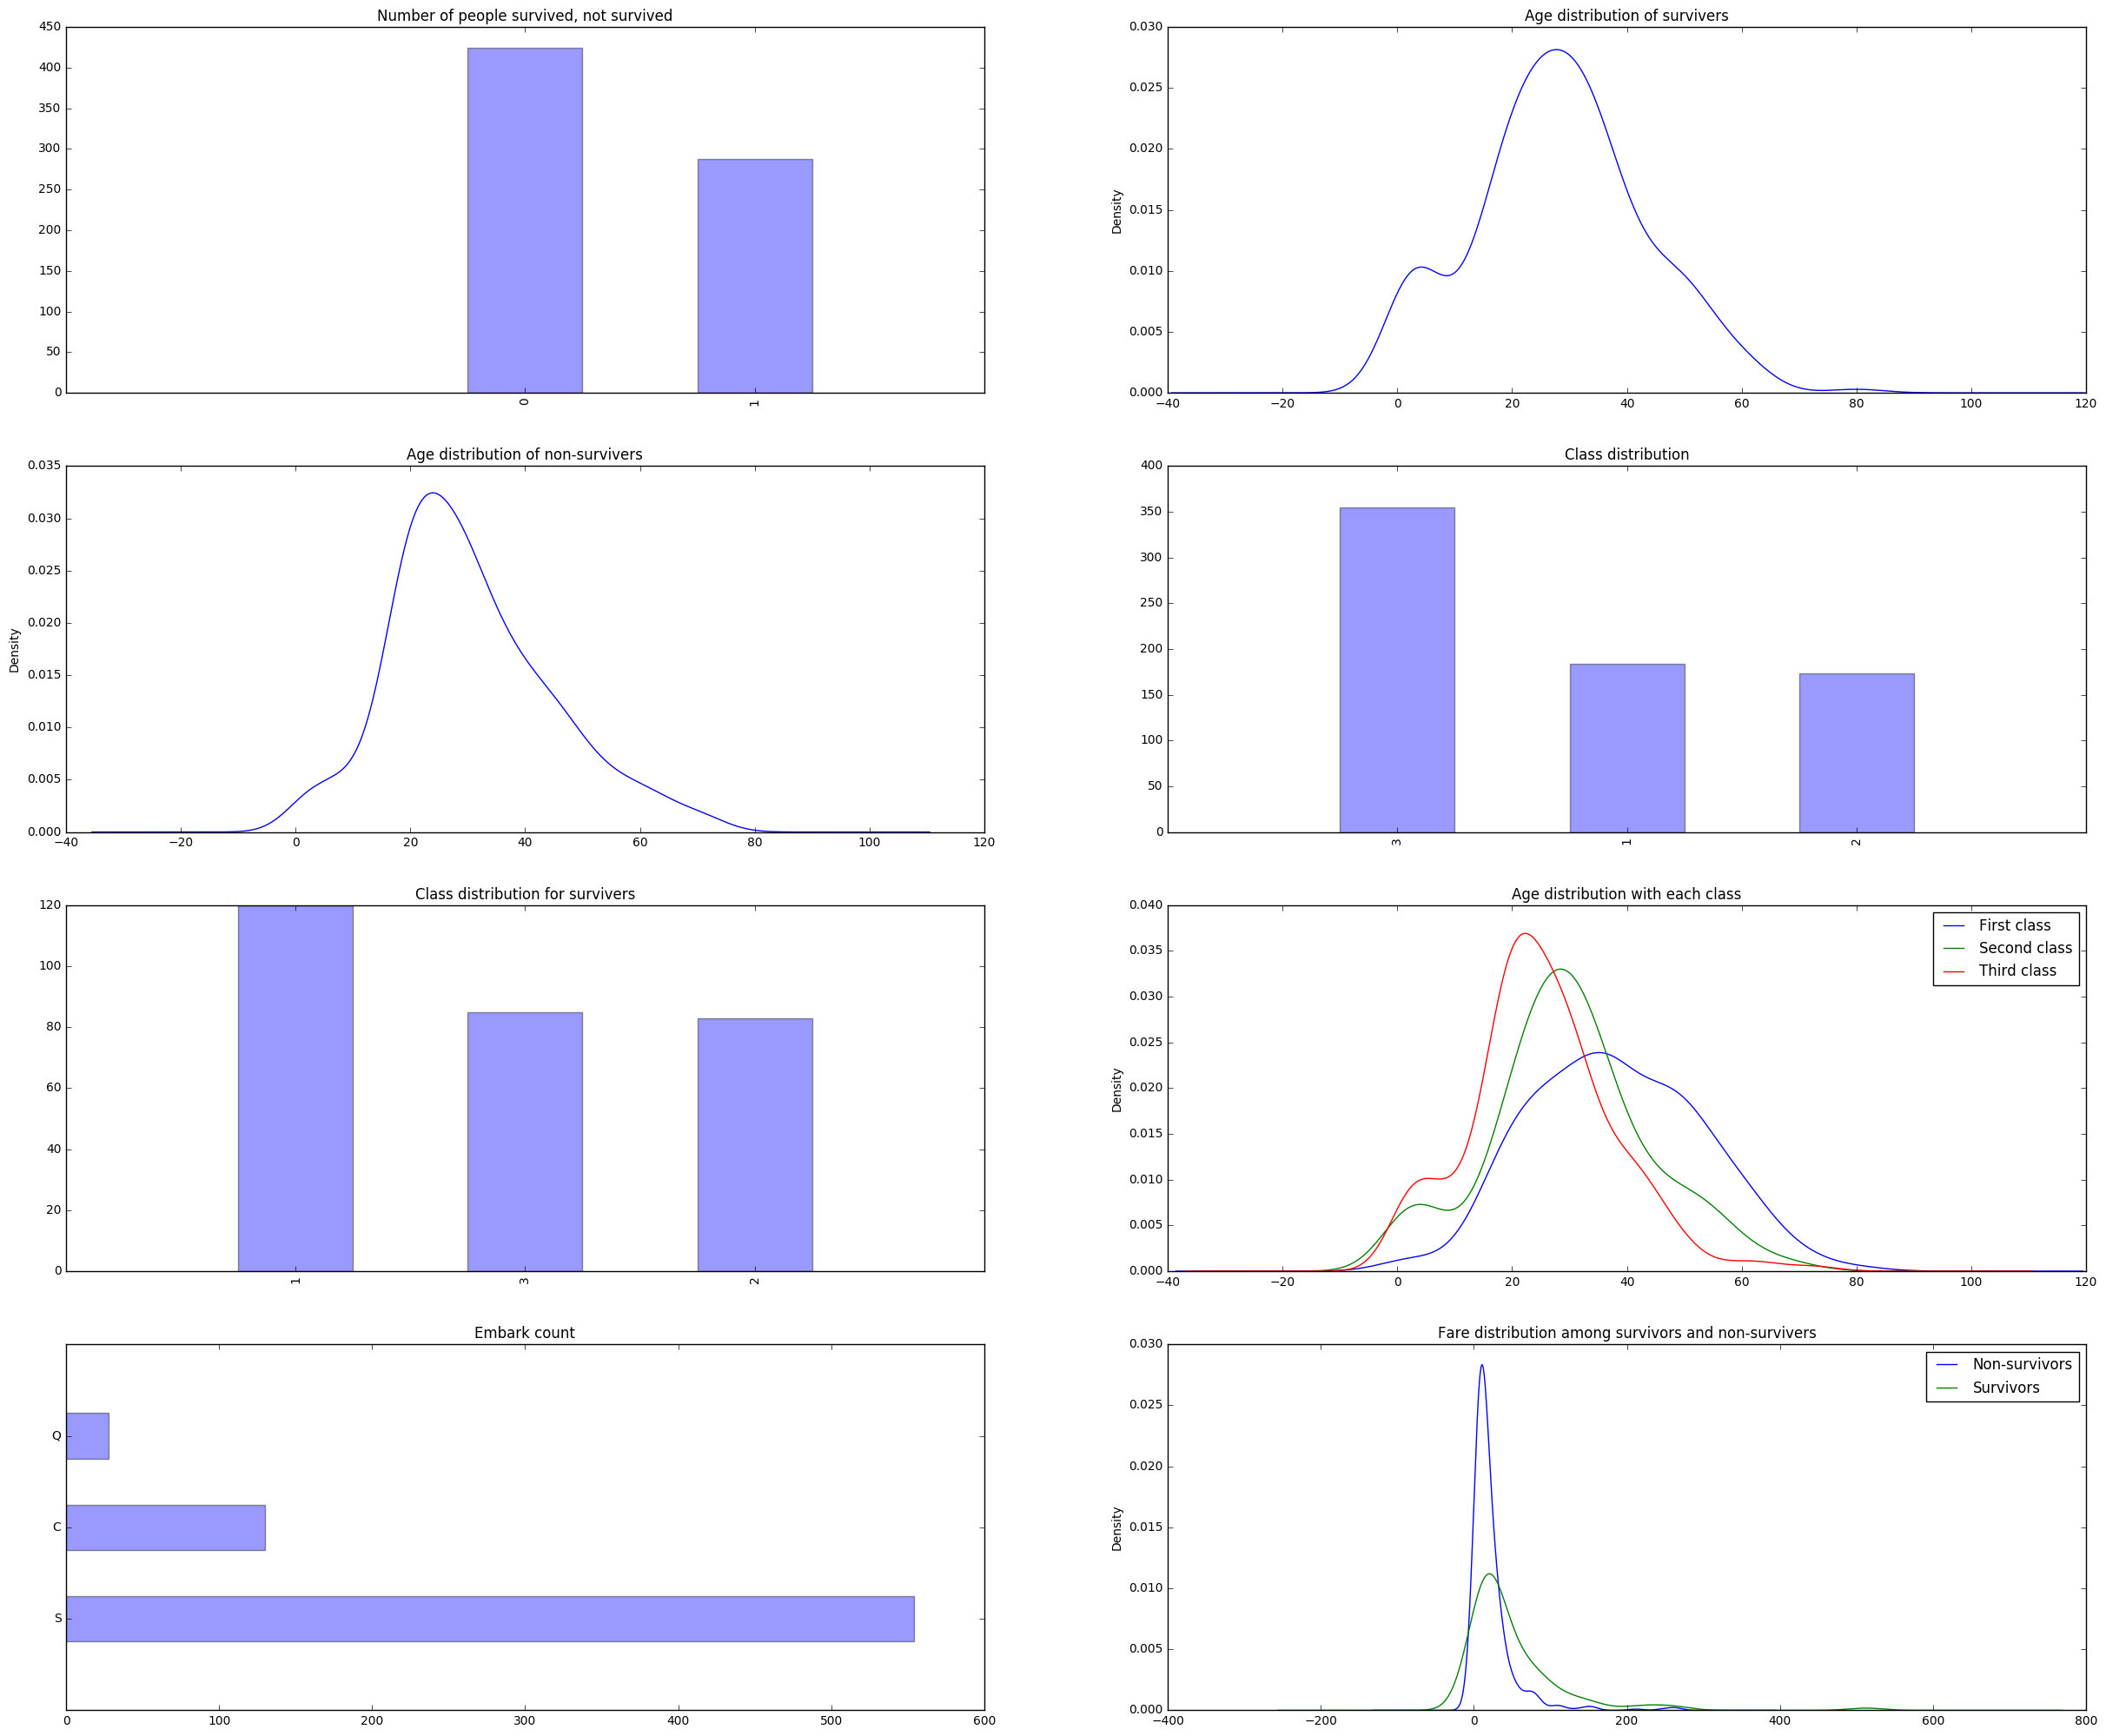

In [14]:
#Plotting basics, pandas beutifully integrates with matplotlib
"""Plots will have
1. Number of people survived, not survived
2. Histogram of people survived with respect to age
3. Histogram of people who did not survived with respect to age
4. Class distribution
5. Class distribution for people who survived
6. Age distribution with each class
7. Embark count
8. Fare distribution with each class"""

#All in one figure
fig = plt.figure(figsize=(30,25),dpi=2000)

subplot1 = plt.subplot2grid((4,2),(0,0))
data_file.Survived.value_counts().plot(kind='bar', alpha = 0.4)
subplot1.set_xlim(-2,2)
plt.title("Number of people survived, not survived")

subplot2 = plt.subplot2grid((4,2),(0,1))
data_file.Age[data_file.Survived==1].plot(kind='kde')
plt.title("Age distribution of survivers")

subplot3 = plt.subplot2grid((4,2),(1,0))
data_file.Age[data_file.Survived==0].plot(kind='kde')
plt.title("Age distribution of non-survivers")

subplot4 = plt.subplot2grid((4,2),(1,1))
data_file.Pclass.value_counts().plot(kind="bar", alpha = 0.4)
subplot4.set_xlim(-1, len(data_file.Pclass.value_counts()))
plt.title("Class distribution")

subplot5 = plt.subplot2grid((4,2),(2,0))
data_file.Pclass[data_file.Survived==1].value_counts().plot(kind="bar", alpha = 0.4)
subplot5.set_xlim(-1, len(data_file.Pclass[data_file.Survived==1].value_counts()))
plt.title("Class distribution for survivers")

subplot6 = plt.subplot2grid((4,2),(2,1))
data_file.Age[data_file.Pclass == 1].plot(kind='kde')
data_file.Age[data_file.Pclass == 2].plot(kind='kde')
data_file.Age[data_file.Pclass == 3].plot(kind='kde')
plt.title("Age distribution with each class")
plt.legend(('First class','Second class','Third class'),loc='best')

subplot7 = plt.subplot2grid((4,2),(3,0))
data_file.Embarked.value_counts().plot(kind='barh',alpha=0.4)
subplot7.set_ylim(-1, len(data_file.Embarked.value_counts()))
plt.title("Embark count")

subplot8 = plt.subplot2grid((4,2),(3,1))
data_file.Fare[data_file.Survived == 0].plot(kind='kde')
data_file.Fare[data_file.Survived == 1].plot(kind='kde')
plt.title("Fare distribution among survivors and non-survivers")
plt.legend(('Non-survivors','Survivors'),loc='best')


In [ ]:
#Graphical Analysis for Sex and survivors
